In [5]:
#*******************************************************************************************************************************************
#                                                                                                                                          *
#                                                Model Ensembles  -  Boosting                                                              *
#                                                                                                                                          *
#     - Implementation of a LightGBM model for binary classification on the Titanic dataset.                                               *
#     - This code defines a LightGBMModel class, which initializes a LightGBM classifier with                                              *
#       specified parameters such as the number of estimators and maximum depth.                                                           *
#     - The class includes methods for fitting the model to training data, making predictions, and evaluating the model's performance.     *
#     - It also provides visualization of the ROC curve and confusion matrix for evaluation.                                               *
#     - The Titanic dataset is loaded, preprocessed, and split into training and testing sets.                                             *
#     - Finally, the LightGBM model is initialized, trained on the training data, evaluated on the testing data,                           *
#       and conclusions are drawn based on the evaluation.                                                                                 *
#                                                                                                                                          *
#*******************************************************************************************************************************************

In [6]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, confusion_matrix

In [7]:
class LightGBMModel:
    def __init__(self, n_estimators=50, max_depth=1):
        '''
           Initialize LightGBM model with specified number of estimators and max depth
        '''
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.model = lgb.LGBMClassifier(n_estimators=self.n_estimators, max_depth=self.max_depth)

    def fit(self, X, y):
        '''
           Fit the LightGBM model to the training data
        '''
        self.model.fit(X, y)

    def predict(self, X):
        '''
           Predict the class labels for the input data
        '''
        return self.model.predict(X)

    def predict_proba(self, X):
        '''
           Predict class probabilities for the input data
        '''
        return self.model.predict_proba(X)[:, 1]

    def evaluate_and_conclude(self, X_test, y_test):
        '''
           Evaluate the LightGBM model on the test data
        '''
        y_pred = self.predict(X_test)
        print("*******************************************************************************************************************")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        print("*******************************************************************************************************************\n\n")
        y_pred_prob = self.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label='ROC curve')
        plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()
        print("\n\n")

        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
        plt.colorbar()
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.xticks([0, 1], ['Not Survived', 'Survived'])
        plt.yticks([0, 1], ['Not Survived', 'Survived'])
        for i in range(2):
            for j in range(2):
                plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')
        plt.show()

        self.banner()

    def banner(self):
        print("""
______________________________________________________________________________________________
|                                                                                             |
|         Conclusion and Suggestions:                                                         |
|             Based on the evaluation of the LightGBM model and comparison with other models, |
|             we observe a noticeable improvement in the classification results,              |
|             indicating the effectiveness of the implemented algorithm.                      |
|             This model speaks for itself in terms of performance.                           |
|                                                                                             |
|_____________________________________________________________________________________________|
        """)

[LightGBM] [Info] Number of positive: 100, number of negative: 46
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 146, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684932 -> initscore=0.776529
[LightGBM] [Info] Start training from score 0.776529
*******************************************************************************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.80      0.87      0.83        23

    accuracy                           0.78        37
   macro avg       0.78      0.76      0.76        37
weighted avg       0.78      0.78      0.78

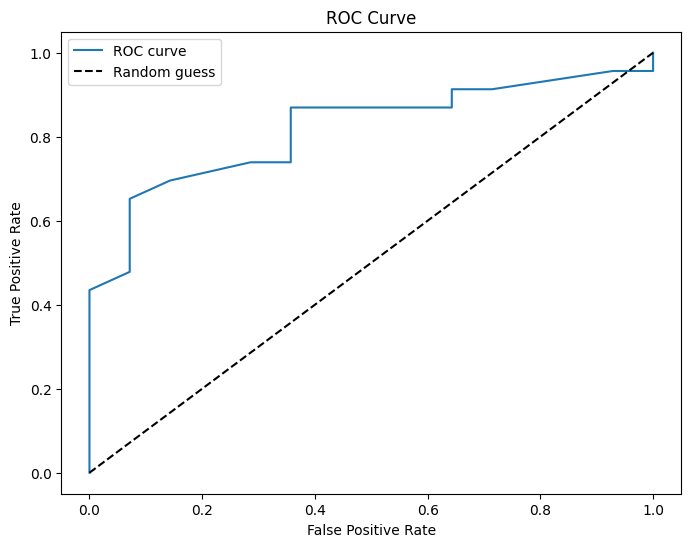

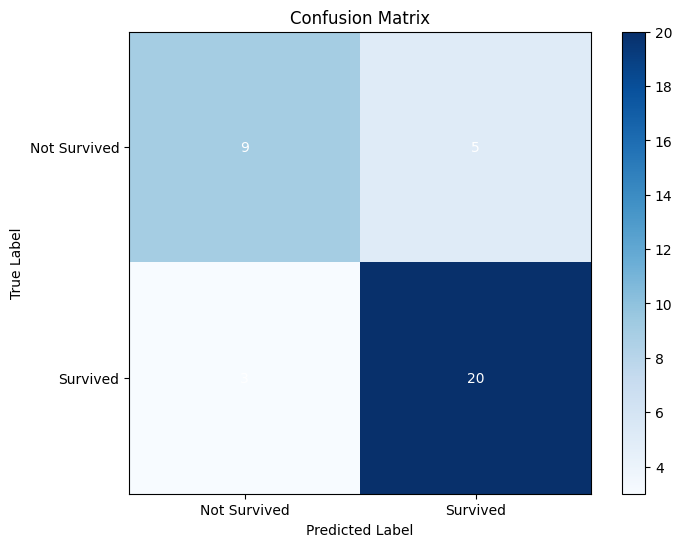


______________________________________________________________________________________________
|                                                                                             |
|         Conclusion and Suggestions:                                                         |
|             Based on the evaluation of the LightGBM model and comparison with other models, |
|             we observe a noticeable improvement in the classification results,              |
|             indicating the effectiveness of the implemented algorithm.                      |
|             This model speaks for itself in terms of performance.                           |
|                                                                                             |
|_____________________________________________________________________________________________|
        


In [8]:
titanic_df = pd.read_csv("titanic.csv")                                                         # Load the Titanic dataset
titanic_df = titanic_df.dropna()                                                                # Preprocess the data (you may need to handle missing values, encode categorical variables, etc.)
X = titanic_df[['Pclass', 'Age', 'Fare', 'Sex', 'SibSp', 'Parch', 'Embarked']].values
y = titanic_df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)       # Split the data into train and test sets
label_encoder = LabelEncoder()
X_train[:, 3] = label_encoder.fit_transform(X_train[:, 3])
X_test[:, 3] = label_encoder.transform(X_test[:, 3])
label_encoder = LabelEncoder()
X_train[:, 6] = label_encoder.fit_transform(X_train[:, 6])
X_test[:, 6] = label_encoder.transform(X_test[:, 6])
clf = LightGBMModel(n_estimators=50, max_depth=1)                                               # Initialize and train LightGBM model
clf.fit(X_train, y_train)
clf.evaluate_and_conclude(X_test, y_test)                                                       # Evaluate and conclude